<a href="https://colab.research.google.com/github/Chen-Portfolio/Predicting-Customer-Purchase-Revenue/blob/main/Predicting_Customer_Revenue_Workbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Description

##### # Historical transaction data from 2010 to 2011. For each transaction, there is a customer identifier, purchase quantity, the data of purchase, unit price as well as some other informaiton about the purchased items.

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso

# Import Dataset

In [2]:
df = pd.read_csv('retail_transactions.csv')

# Explore Data

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,546729,22775,PURPLE DRAWERKNOB ACRYLIC EDWARDIAN,12,2011-03-16 11:36:00,1.25,18231.0,United Kingdom
1,559898,21868,POTTING SHED TEA MUG,6,2011-07-13 12:18:00,1.25,16225.0,United Kingdom
2,548648,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-04-01 13:20:00,0.85,12949.0,United Kingdom
3,540543,22173,METAL 4 HOOK HANGER FRENCH CHATEAU,4,2011-01-09 15:23:00,2.95,14395.0,United Kingdom
4,561390,20726,LUNCH BAG WOODLAND,10,2011-07-27 09:52:00,1.65,17068.0,United Kingdom


In [ ]:
df.dtypes

InvoiceNo        int64
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197320 entries, 0 to 197319
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    197320 non-null  int64  
 1   StockCode    197320 non-null  object 
 2   Description  197320 non-null  object 
 3   Quantity     197319 non-null  float64
 4   InvoiceDate  197319 non-null  object 
 5   UnitPrice    197319 non-null  float64
 6   CustomerID   197319 non-null  float64
 7   Country      197319 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 12.0+ MB


In [8]:
df['CustomerID'].nunique()

4287

# Feature Engineering

## Convert 'InvoiceDate' Column to date format

In [ ]:
 df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

## Create a new column 'Revenue'

In [ ]:
df['Revenue'] = df['UnitPrice'] * df['Quantity']

## Groupby column 'InvoiceNo' and apply aggregation

In [ ]:
operations = {'Revenue': 'sum', 'InvoiceDate':'first', 'CustomerID':'first', 'Country':'first'}
df = df.groupby('InvoiceNo').agg(operations)

In [ ]:
df.head()

,Revenue,InvoiceDate,CustomerID,Country
InvoiceNo,,,,
536365,139.12,2010-12-01 08:26:00,17850.0,United Kingdom
536366,22.20,2010-12-01 08:28:00,17850.0,United Kingdom
536367,278.73,2010-12-01 08:34:00,13047.0,United Kingdom
536368,70.05,2010-12-01 08:34:00,13047.0,United Kingdom
536369,17.85,2010-12-01 08:35:00,13047.0,United Kingdom


In [ ]:
df.tail()

,Revenue,InvoiceDate,CustomerID,Country
InvoiceNo,,,,
581583,124.60,2011-12-09 12:23:00,13777.0,United Kingdom
581584,140.64,2011-12-09 12:25:00,13777.0,United Kingdom
581585,329.05,2011-12-09 12:31:00,15804.0,United Kingdom
581586,339.20,2011-12-09 12:49:00,13113.0,United Kingdom
581587,249.45,2011-12-09 12:50:00,12680.0,France


## Create a new column 'Year'

In [ ]:
df['Year'] = df['InvoiceDate'].apply(lambda x: x.year)

## Create a new column 'Days_Since'

In [ ]:
df['Days_Since'] = (pd.datetime(year=2010, month=12, day=31) - df['InvoiceDate']).apply(lambda x: x.days)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [ ]:
df.head()

,Revenue,InvoiceDate,CustomerID,Country,Year,Days_Since
InvoiceNo,,,,,,
536365,139.12,2010-12-01 08:26:00,17850.0,United Kingdom,2010,29
536366,22.20,2010-12-01 08:28:00,17850.0,United Kingdom,2010,29
536367,278.73,2010-12-01 08:34:00,13047.0,United Kingdom,2010,29
536368,70.05,2010-12-01 08:34:00,13047.0,United Kingdom,2010,29
536369,17.85,2010-12-01 08:35:00,13047.0,United Kingdom,2010,29


In [ ]:
df.tail()

,Revenue,InvoiceDate,CustomerID,Country,Year,Days_Since
InvoiceNo,,,,,,
581583,124.60,2011-12-09 12:23:00,13777.0,United Kingdom,2011,-344
581584,140.64,2011-12-09 12:25:00,13777.0,United Kingdom,2011,-344
581585,329.05,2011-12-09 12:31:00,15804.0,United Kingdom,2011,-344
581586,339.20,2011-12-09 12:49:00,13113.0,United Kingdom,2011,-344
581587,249.45,2011-12-09 12:50:00,12680.0,France,2011,-344


## Groupby 'CustomerID' and Apply Aggregations

In [ ]:
operations = {'Revenue':'sum', 'Days_Since':['max', 'min', 'nunique']}
X = df[df['Year'] == 2010].groupby('CustomerID').agg(operations)
X.head(10)

Revenue Days_Since            
                sum        max min nunique
CustomerID                                
12347.0      711.79         23  23       1
12348.0      892.80         14  14       1
12370.0     1868.02         16  13       2
12377.0     1001.52         10  10       1
12383.0      600.72          8   8       1
12386.0      258.90         22  22       1
12395.0      679.92         27  13       2
12417.0      291.34         13  13       1
12423.0      237.93          9   9       1
12427.0      303.50         27  27       1

In [ ]:
X.columns.values

array([('Revenue', 'sum'), ('Days_Since', 'max'), ('Days_Since', 'min'),
       ('Days_Since', 'nunique')], dtype=object)

In [ ]:
# strip() ： removes any leading and trailing characters (space is the default leading character to remove)
X.columns = [' '.join(col).strip() for col in X.columns.values]

In [ ]:
X.head()

,Revenue sum,Days_Since max,Days_Since min,Days_Since nunique
CustomerID,,,,
12347.0,711.79,23,23,1
12348.0,892.80,14,14,1
12370.0,1868.02,16,13,2
12377.0,1001.52,10,10,1
12383.0,600.72,8,8,1


## Create a new column 'Avg_Order_Cost'

In [ ]:
# Actually it's the avg. spent per day not per order, but assuming that if two oders putting the same day, we can treat them as part of the same order 
X['Avg_Order_Cost'] = X['Revenue sum'] / X['Days_Since nunique']

# Identify Independent and Dependent Variables

In [ ]:
# independent variable
X.head()

,Revenue sum,Days_Since max,Days_Since min,Days_Since nunique,Avg_Order_Cost
CustomerID,,,,,
12347.0,711.79,23,23,1,711.79
12348.0,892.80,14,14,1,892.80
12370.0,1868.02,16,13,2,934.01
12377.0,1001.52,10,10,1,1001.52
12383.0,600.72,8,8,1,600.72


In [ ]:
# dependent variable
y = df[df['Year'] == 2011].groupby('CustomerID')['Revenue'].sum()

In [ ]:
y.head()

CustomerID
12347.0    3598.21
12348.0     904.44
12370.0    1677.67
12377.0     626.60
12383.0    1249.84
Name: 2011 Revenue, dtype: float64

## Put both variables into a single DataFrame and Rename Columns

In [ ]:
wrangled_df = pd.concat([X, y], axis = 1)
wrangled_df.columns = ['2010 Revenue', 'Days_since_first_purchase', 'Days_since_last_purchase', 'Number_of_purchases', 'Avg_order_cost', '2011 Revenue']
wrangled_df.head()

# NaN caused by customers who were active either in only 2010 or only in 2011 

,2010 Revenue,Days_since_first_purchase,Days_since_last_purchase,Number_of_purchases,Avg_order_cost,2011 Revenue
CustomerID,,,,,,
12347.0,711.79,23,23,1,711.79,3598.21
12348.0,892.80,14,14,1,892.80,904.44
12370.0,1868.02,16,13,2,934.01,1677.67
12377.0,1001.52,10,10,1,1001.52,626.60
12383.0,600.72,8,8,1,600.72,1249.84


### Drop all customers not active in both years

In [ ]:
wrangled_df = wrangled_df[~wrangled_df['2010 Revenue'].isnull()]
wrangled_df = wrangled_df[~wrangled_df['2011 Revenue'].isnull()]

In [ ]:
wrangled_df.head()

,2010 Revenue,Days_since_first_purchase,Days_since_last_purchase,Number_of_purchases,Avg_order_cost,2011 Revenue
CustomerID,,,,,,
12347.0,711.79,23,23,1,711.79,3598.21
12348.0,892.80,14,14,1,892.80,904.44
12370.0,1868.02,16,13,2,934.01,1677.67
12377.0,1001.52,10,10,1,1001.52,626.60
12383.0,600.72,8,8,1,600.72,1249.84


### Drop outliers

In [ ]:
# Outliers: any data point more than 3 std above the median
wrangled_df = wrangled_df[wrangled_df['2010 Revenue'] < (wrangled_df['2010 Revenue'].median() + wrangled_df['2010 Revenue'].std()*3)]
wrangled_df = wrangled_df[wrangled_df['2011 Revenue'] < (wrangled_df['2011 Revenue'].median() + wrangled_df['2011 Revenue'].std()*3)]

# Save data after cleaning and feature engineering into a new file

In [ ]:
wrangled_df.to_csv('wrangled_transactions.csv')
wrangled_df.head()

,2010 Revenue,Days_since_first_purchase,Days_since_last_purchase,Number_of_purchases,Avg_order_cost,2011 Revenue
CustomerID,,,,,,
12347.0,711.79,23,23,1,711.79,3598.21
12348.0,892.80,14,14,1,892.80,904.44
12370.0,1868.02,16,13,2,934.01,1677.67
12377.0,1001.52,10,10,1,1001.52,626.60
12383.0,600.72,8,8,1,600.72,1249.84


# Examine Relationship among variables


## Method 1: sns.pairplot()

In [ ]:
df = pd.read_csv('wrangled_transactions.csv', index_col = 'CustomerID')

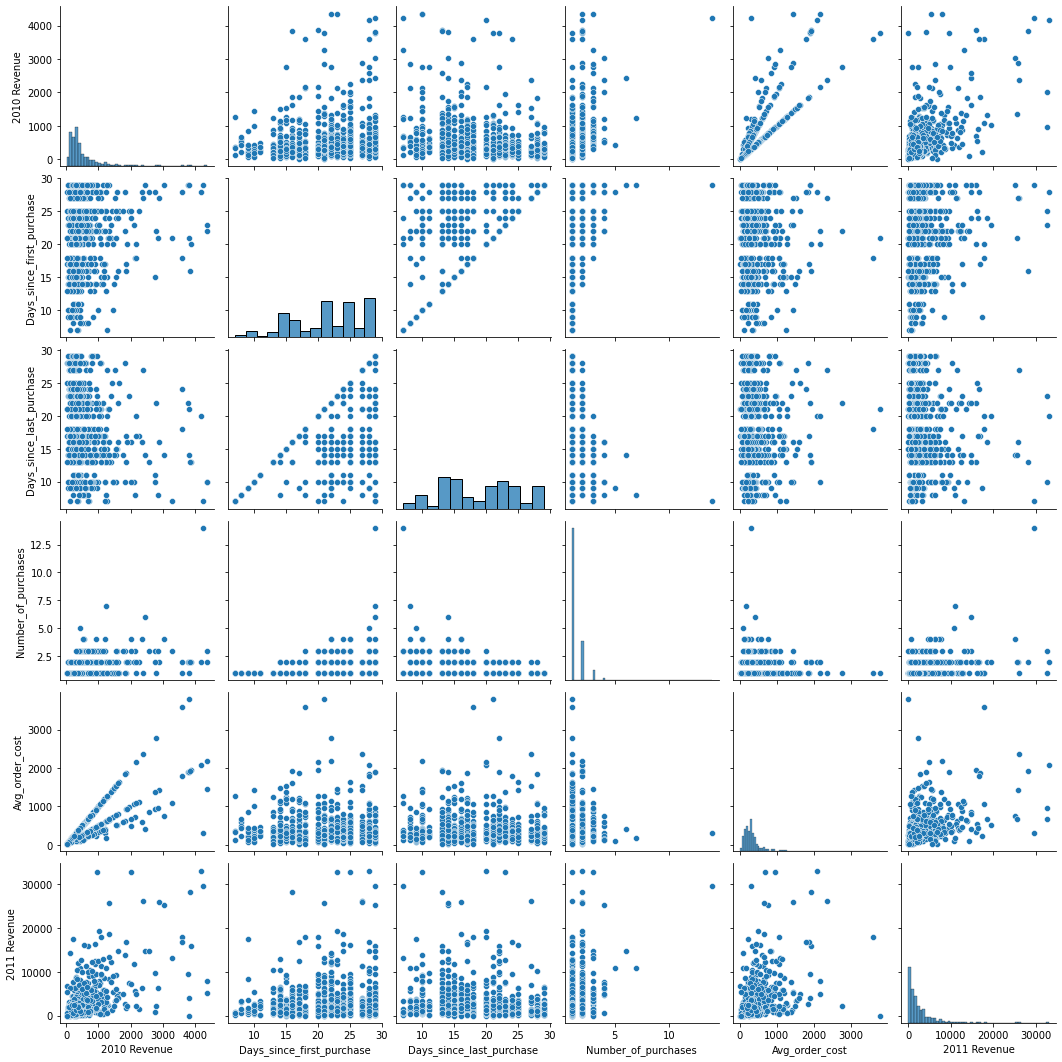

In [ ]:
import seaborn as sns
%matplotlib inline
sns.pairplot(df)

# show a histgram for each variable
# scatterplot shows relationship betw. one variable and each other variable
# Last row: 2011 Revenue against each of independent variable

## Method 2: sns.heatmap()

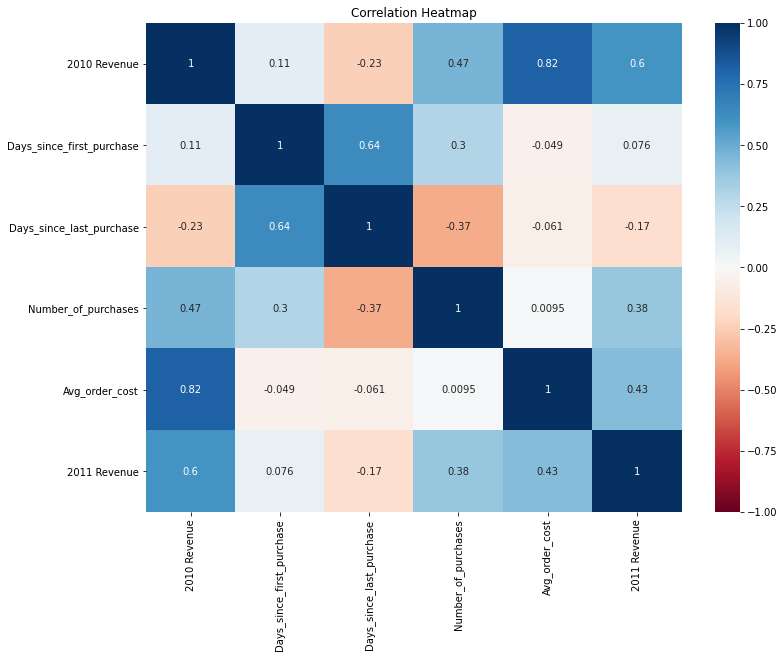

In [ ]:
plt.figure(figsize = (12, 9))
s = sns.heatmap(df.corr(), annot = True, cmap = 'RdBu', vmin = -1, vmax = 1)
plt.title('Correlation Heatmap')
plt.show()

# Apply Linear Regression Model

## Identify X and y

In [ ]:
# Since 'Days_since_first_purchase' has a weak relationship with '2011 Revenue', drop this feature

X = df[['2010 Revenue', 'Days_since_last_purchase', 'Number_of_purchases', 'Avg_order_cost']]

In [ ]:
y = df['2011 Revenue']

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [ ]:
type(X_test)

pandas.core.frame.DataFrame

In [ ]:
type(y_test)

pandas.core.series.Series

## Training the Simple Linear Regression model on the Training set

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Check model coefficient

In [ ]:
model.coef_

# in the order of columns in X

array([  5.43967256,   9.81048088, 328.56812319,  -2.27099117])

## Check model intercept

In [ ]:
model.intercept_

338.942428194945

## Predict the Test set result

In [ ]:
y_pred = model.predict(X_test)

## Visualization betw. y_pred(predicted values) and y_test(true value)

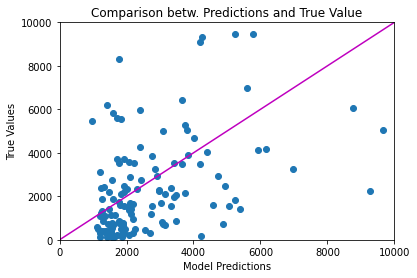

In [ ]:
plt.scatter(y_pred, y_test)
plt.plot([0, 10000], [0,10000], 'k-', color = 'm')   # Reference line, means predictions = true value
plt.xlim(0, 10000)
plt.ylim(0, 10000)
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.title('Comparison betw. Predictions and True Value')
plt.show()

# Since many of our points are quite far fm the reference line, indicates the model is not completely accurate

## Further examine the relationship betw. predictions and true values by 'pearsonr'

In [ ]:
from scipy.stats.stats import pearsonr
pearsonr(y_pred, y_test)

# 1st number indicating relationship
# 2nd number is P-value indicating the probability that u will see a relationship this strong 

(0.3941018631119753, 6.04357070028145e-07)

# Evaluate the Model by Metrics

## Calculating RMSE and MAE 

### Method 1: by formula

In [ ]:
error = y_pred - y_test

In [ ]:
rmse = (error**2).mean()**.5
mae = abs(error).mean()

In [ ]:
rmse

4288.432748257349

In [ ]:
mae

2367.7055949195696

### Method 2: by functions

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

18390655.436326083

In [ ]:
import math
rmse = math.sqrt(mse)
print('rmse: ' + str(rmse))

rmse: 4288.432748257349


In [ ]:
from sklearn.metrics import mean_absolute_error
mae =  mean_absolute_error(y_test, y_pred)
print('mae: ' + str(mae))

mae: 2367.7055949195706


## Revise the Model by dropping feature "Days_since_last_purchase"

In [ ]:
X_train2 = X_train.drop('Days_since_last_purchase', axis = 1)
X_test2 = X_test.drop('Days_since_last_purchase', axis = 1)
model.fit(X_train2, y_train)
y_pred2 = model.predict(X_test2)

In [ ]:
mse2= mean_squared_error(y_test, y_pred2)
rmse2 = math.sqrt(mse2)
print('rmse2: ' + str(rmse2))

rmse2: 4288.313750790882


In [ ]:
mae2 = mean_absolute_error(y_test, y_pred2)
print('mae2: ' + str(mae2))
                          

mae2: 2367.7972018228033


### Result: Both rmse2 and mae 2 are bigger than previous result, so dropping "Days_since_last_purchase" increase erros in the model on test set; in other words, the model was more accurate when it contained the dropped column 

### Insight: We can see how rmse and mae can be used to determine which feature is important to have in a model, and those who have little impact on performance can be dropped.

# Evaluate the Model by Regularization (Lasso Model) - Feature Selection

In [ ]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(normalize = True, random_state = 10)
lasso_model.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=10, selection='cyclic',
      tol=0.0001, warm_start=False)

In [ ]:
lasso_model.coef_

array([  4.97959646,   2.48242858, 432.7218487 ,  -1.62464622])

## Result: Lasso Model still uses all the variables used in previous model, that means all features have predictive power, no need to drop any one.